In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
dataset_dir="/content/drive/MyDrive/CNN- leaf classification"

In [ ]:
image_size=(128,128)
class_names=[]
data=[]
labels=[]
error_files=[]
for class_id, folder in enumerate(os.listdir(dataset_dir)):
    folder_path=os.path.join(dataset_dir,folder)
    if os.path.isdir(folder_path):
      class_names.append(folder)
      for file in os.listdir(folder_path):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
          img_path = os.path.join(folder_path, file)
          try:
            img=load_img(img_path,target_size=image_size)
            img_array=img_to_array(img)
            data.append(img_array)
            labels.append(class_id)
          except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            error_files.append(img_path)

Error loading image /content/drive/MyDrive/CNN- leaf classification/Vad/301.jpg: cannot identify image file <_io.BytesIO object at 0x79aa346d6c00>
Error loading image /content/drive/MyDrive/CNN- leaf classification/Sonmohar/301.jpg: cannot identify image file <_io.BytesIO object at 0x79aa35381f30>


In [ ]:
for file in error_files:
  print(file)
  try:
    os.remove(file)
    print(f"File {file} deleted successfully.")
  except OSError as e:
    print(f"Error deleting file {file}: {e}") #No need for this error_files are not appended to data list

/content/drive/MyDrive/CNN- leaf classification/Vad/301.jpg
Error deleting file /content/drive/MyDrive/CNN- leaf classification/Vad/301.jpg: [Errno 1] Operation not permitted: '/content/drive/MyDrive/CNN- leaf classification/Vad/301.jpg'
/content/drive/MyDrive/CNN- leaf classification/Sonmohar/301.jpg
Error deleting file /content/drive/MyDrive/CNN- leaf classification/Sonmohar/301.jpg: [Errno 1] Operation not permitted: '/content/drive/MyDrive/CNN- leaf classification/Sonmohar/301.jpg'


In [ ]:
data=np.array(data,dtype='float32')
labels=np.array(labels, dtype='int')

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
data=data/255.0
labels=to_categorical(labels,num_classes=len(class_names))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

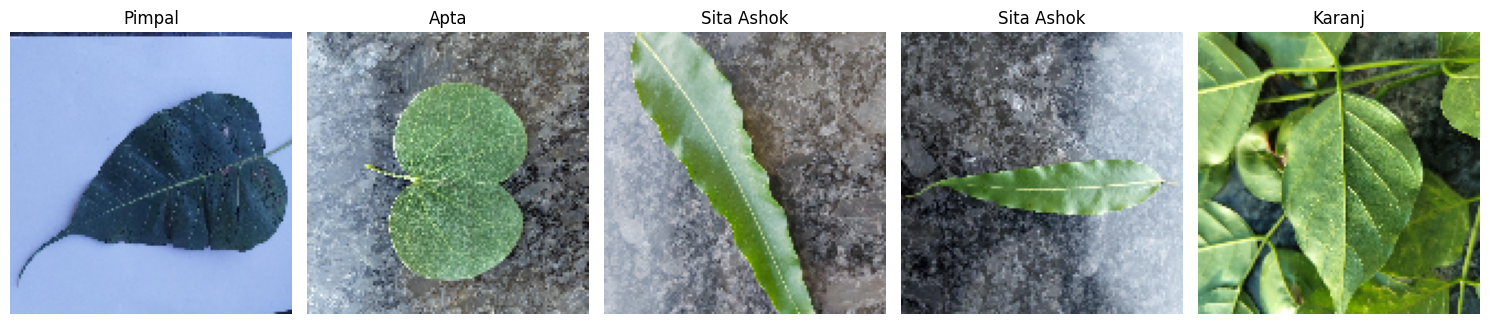

In [ ]:
def display_sample_images(images, labels, class_names, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, n, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[np.argmax(labels[idx])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(X_train, y_train, class_names)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(class_names), activation="softmax"))
learning_rate = 0.001
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=learning_rate),
    metrics=["accuracy"],
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.1655 - loss: 2.3732 - val_accuracy: 0.1899 - val_loss: 2.0828
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.2358 - loss: 2.1075 - val_accuracy: 0.3038 - val_loss: 1.9556
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3894 - loss: 1.8280 - val_accuracy: 0.4114 - val_loss: 1.7564
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4704 - loss: 1.5502 - val_accuracy: 0.4873 - val_loss: 1.5504
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5796 - loss: 1.2984 - val_accuracy: 0.5253 - val_loss: 1.4714
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.6153 - loss: 1.1480 - val_accuracy: 0.5570 - val_loss: 1.4213
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.6897 - loss: 0.9340 - val_accuracy: 0.5380 - val_loss: 1.3737
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.7746 - loss: 0.7064 - val_accuracy: 0.5823 - val_lo

In [ ]:
loss, accuracy = model.evaluate(X_test,y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.7328 - loss: 1.0743
Test Loss: 1.1768347024917603
Test Accuracy: 0.692893385887146


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
conf_matrix=confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print("Confusion Matrix:")
print(conf_matrix)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step
Confusion Matrix:
[[48  0  0  2  1  2  0  0  5  2]
 [ 2 48  5  1  0  1  7  1  0  3]
 [ 1  0 45  0  0  1  1  0  0  3]
 [ 5  1  9  6  0  1  2  0  1  1]
 [ 0  4  2  0 13  0  0  0  0  0]
 [ 0  1  0  2  3  3  1  0  0  0]
 [ 1  1  3  1  1  0 46  0  2  4]
 [ 0  2  6  2  2  1  0  3  0  3]
 [ 2  0  1  0  0  1  2  0 16  0]
 [ 2  0  6  1  0  1  1  2  2 45]]


In [ ]:
report=classification_report(np.argmax(y_test,axis=1),y_pred,target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
                    precision    recall  f1-score   support

               Vad       0.79      0.80      0.79        60
            Karanj       0.84      0.71      0.77        68
        Sita Ashok       0.58      0.88      0.70        51
   Vilayati Chinch       0.40      0.23      0.29        26
          Sonmohar       0.65      0.68      0.67        19
            Kashid       0.27      0.30      0.29        10
              Apta       0.77      0.78      0.77        59
           Nilgiri       0.50      0.16      0.24        19
            Pimpal       0.62      0.73      0.67        22
Indian Rubber Tree       0.74      0.75      0.74        60

          accuracy                           0.69       394
         macro avg       0.62      0.60      0.59       394
      weighted avg       0.69      0.69      0.68       394



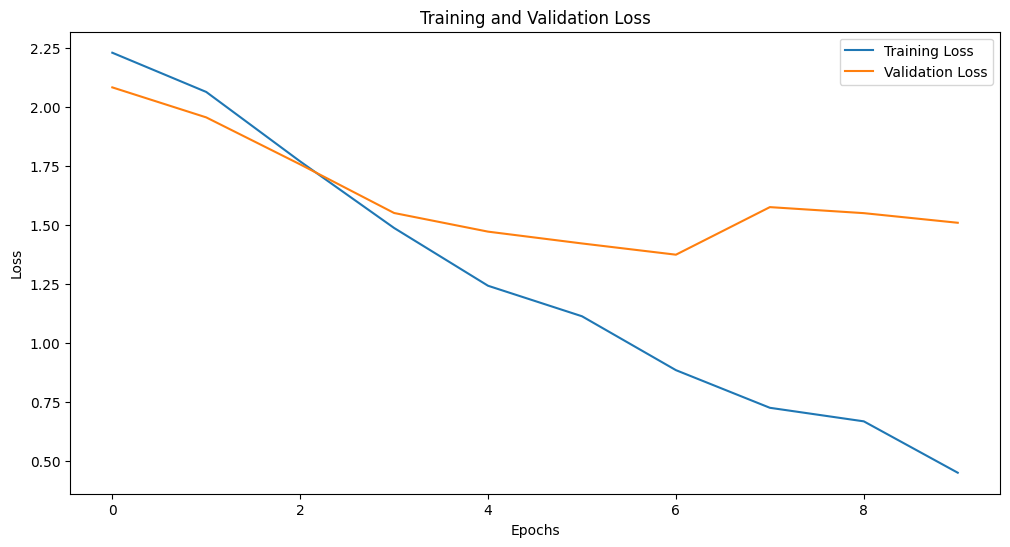

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

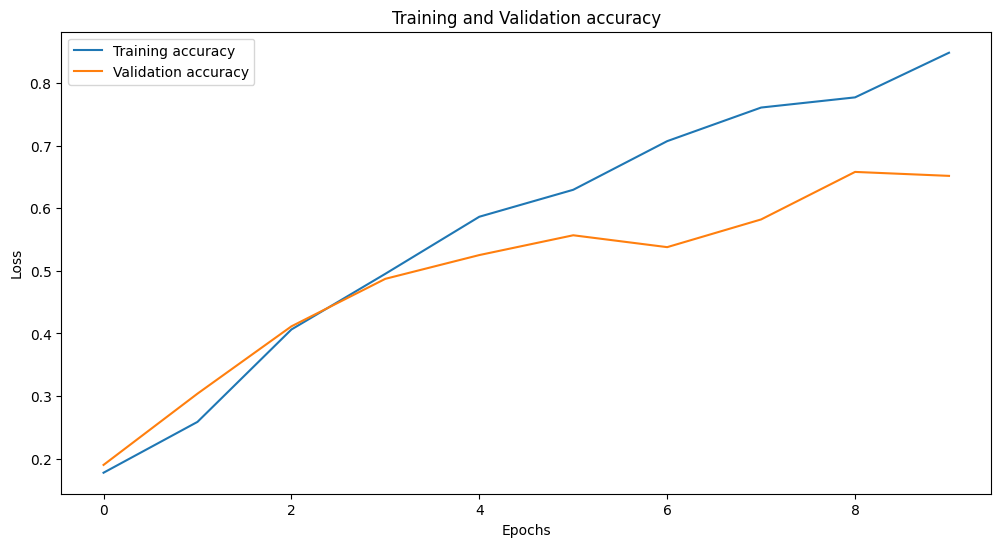

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()